In [29]:
import pyuvdata
import copy
import numpy as np
import glob

In [22]:
hera_file = '/data6/HERA/data/2457458/zen.2457458.16694.xx.uvHH'
uv = pyuvdata.UVData()
uv.read_miriad(hera_file)

In [23]:
uv.data_array.shape

(10640, 1, 1024, 1)

In [24]:
uv_autos = copy.deepcopy(uv)
uv_autos.select(blt_inds=np.where(uv.ant_1_array == uv.ant_2_array)[0])
uv_autos.data_array.shape

(1064, 1, 1024, 1)

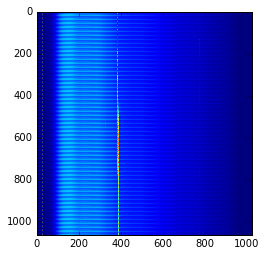

In [28]:
spectra = np.squeeze(np.abs(uv_autos.data_array))

import matplotlib.pyplot
%matplotlib inline
image = matplotlib.pyplot.imshow(spectra)
matplotlib.pyplot.show()

In [32]:
filenames = sorted(glob.glob('/data6/HERA/data/2457458/zen.2457458.*.xx.uvHH'))
len(filenames)

72

In [33]:
uv_new = pyuvdata.UVData()
for f in range(0,12):
    uv_new.read_miriad(filenames[f])
    uv_new.select(blt_inds=np.where(uv.ant_1_array == uv.ant_2_array)[0])
    spectra = np.squeeze(np.abs(uv_new.data_array))
    csv_file = 'spectra-' + str(f+1).zfill(2) + '.csv'
    np.savetxt(csv_file, spectra, delimiter=",")